# **Jobs Analysis Project**  


![Jobs Analysis Dashboard](https://raw.githubusercontent.com/AshishJangra27/Jobs-Analysis-Project/refs/heads/main/banner.png)



## **Overview**  
This project delivers a comprehensive analysis of job market trends, focusing on demand for roles, skill requirements, salary benchmarks, and top employers. Data is sourced from a GitHub repository and processed to extract actionable insights.  

## **Sample Data**
Here is a preview of 5 random rows from the dataset to understand its structure:

| job_id          | job_role                                     | company                                      | experience | salary                     | location                            | rating | reviews        | resposibilities                                                         |
|------------------|---------------------------------------------|---------------------------------------------|------------|----------------------------|-------------------------------------|--------|----------------|------------------------------------------------------------------------|
| 1.511226e+11    | Business Sales Manager - Banca | Life Insurance | Lavya Associates                            | 5-10 Yrs   | 6,00,000 - 8,00,000 PA.   | Jorhat                              | NaN    | NaN            | Life Insurance, BFSI, Bancassurance, team handling                      |
| 3.012220e+11    | HR Manager 1                                 | Emerald Paper Products                       | 2-7 Yrs    | 1,75,000 - 2,50,000 PA.   | Hybrid - Mohanlalganj               | NaN    | NaN            | Human Resource Management, hr, monitoring, Recruitment                 |
| 2.012350e+10    | Executive- DevOps Engineer                   | Rahi                                         | 3-8 Yrs    | Not disclosed             | Pune                                | NaN    | NaN            | Linux, Jenkins, web services, Gitlab, Puppet, DevOps                   |
| 5.012300e+10    | Operation Executive (Females Only)           | Eduworld Bangalore Educational Services      | 1-6 Yrs    | 1,25,000 - 2,50,000 PA.   | Trivandrum/Thiruvananthapuram       | NaN    | NaN            | Team Management, Team Handling, Team Leading, Brand Development        |
| 7.012350e+10    | Product Owner - Arcadis Gen                  | Arcadis Consulting India Pvt. Ltd            | 4-7 Yrs    | Not disclosed             | Noida, Mumbai                       | 4.2    | 145 Reviews    | Product management, Sales, SAP, Performance management                 |


---

## **Objectives**  
- Map the distribution of job roles and industry demand.  
- Identify key skills and experience requirements.  
- Analyze salary patterns across regions and roles.  
- Highlight top hiring companies and their market impact.  

---

## **Data Processing**  
- Handled null values and removed duplicates for integrity.  
- Cleaned and standardized salary and experience fields.  
- Dropped irrelevant columns to streamline analysis.  

---

## **Key Insights**  
- **Market Landscape:** 72,967 job postings across 15,310 companies.  
- **Top Employers:** Identified market leaders based on review metrics.  
- **Role Analysis:** Data Analyst roles are in consistent demand.  
- **Skill Mapping:** Isolated core responsibilities across top roles.  
- **HDFC Bank:** Analyzed specific skill expectations.  

---

## **Visualizations**  
- **Pie Charts:** Company-wise market share visualization.  
- **Bar Charts:** Top skills and responsibilities breakdown.  

---

## **Technologies Used**  
- **Python:** Data manipulation and processing.  
- **Pandas:** Efficient data handling.  
- **Matplotlib & Seaborn:** Clear, insightful visualizations.  

---

## **Future Enhancements**  
- Predictive modeling for salary estimations.  
- Deeper regional analysis of job availability.  
- Skill mapping refinement based on company-specific needs.  

---

## **Author**  
- **Krishna Bahadur** - [GitHub Profile](https://github.com/krishnabahadur04)


---


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('jobs.csv')

### 1. Data Exploration

#### 1.1) Checking Null Values

The dataset contains significant missing values across multiple columns, with **rating** and `reviews` having the highest number of null entries (36,199 each). Other critical columns like `experience` and `location` also have substantial gaps (1,749 and 1,706 respectively).


In [2]:
df.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
posted_on            480
job_link             480
company_link         480
dtype: int64

#### 1.2) Checking Duplicates

In [3]:
df.duplicated(subset = 'job_id').sum()

np.int64(6137)

#### 1.3) Remove columns

In [4]:
del df['posted_on']
del df['job_link']
del df['company_link']

### 2. Data Cleaning

#### 2.1) Dealing with Null Values

- **Removed Rows:**  
  - Entries with missing values in **`job_id`**, **`resposibilities`**, and **`company`** were completely removed.  

- **Imputed Values:**  
  - **Experience:** Missing values filled with ➡️ **`5-10 Yrs`**  
  - **Location:** Missing values filled with ➡️ **`Bangalore/Bengaluru`**  
  - **Rating:** Missing values filled with ➡️ **`0.0`** (indicating no rating)  
  - **Reviews:** Missing values filled with ➡️ **`0 Reviews`**  

These steps ensure a cleaner and more consistent dataset for analysis.  


In [5]:
df.isnull().sum()

df = df.dropna(subset = ['job_id','resposibilities','company'])

df['experience'] = df['experience'].fillna('5-10 Yrs')
df['location'] = df['location'].fillna('Bangalore/Bengaluru')
df['rating'] = df['rating'].fillna(0.0)
df['reviews'] = df['reviews'].fillna('0 Reviews')

#### 2.2) Dealing with Duplicates

- All duplicate entries based on the **`job_id`** column have been **successfully removed**.  
- This ensures each job listing is **unique and consistent**, preventing redundancy in the analysis.  


In [6]:
df = df.drop_duplicates(subset = 'job_id')

#### 2.3) Change the datatype of job_id

In [7]:
df['job_id'] = df['job_id'].astype('int').astype(str)

#### 2.4) Clean Experience Column

In [8]:
df['min_experience'] = df['experience'].str.replace('Yrs','').str.split('-').str[0].str.strip().astype('int')
df['max_experience'] = df['experience'].str.replace('Yrs','').str.split('-').str[1].str.strip().astype('int')

#### 2.5) Clean Salary Column

In [9]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()

df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']


df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')
del df['clean_salary']

del df['salary']
del df['experience']

#### 2.7) Clean review columns

In [10]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

### 3. Data Analysis

#### 3.1) Overall Analysis

In [11]:
print('-'*30)
print('Total Jobs         : ', len(df))
print('Total Companies    : ', df['company'].nunique())
print('-'*30)

------------------------------
Total Jobs         :  72967
Total Companies    :  15310
------------------------------


#### 3.2) Top 5 companies (Reviews)

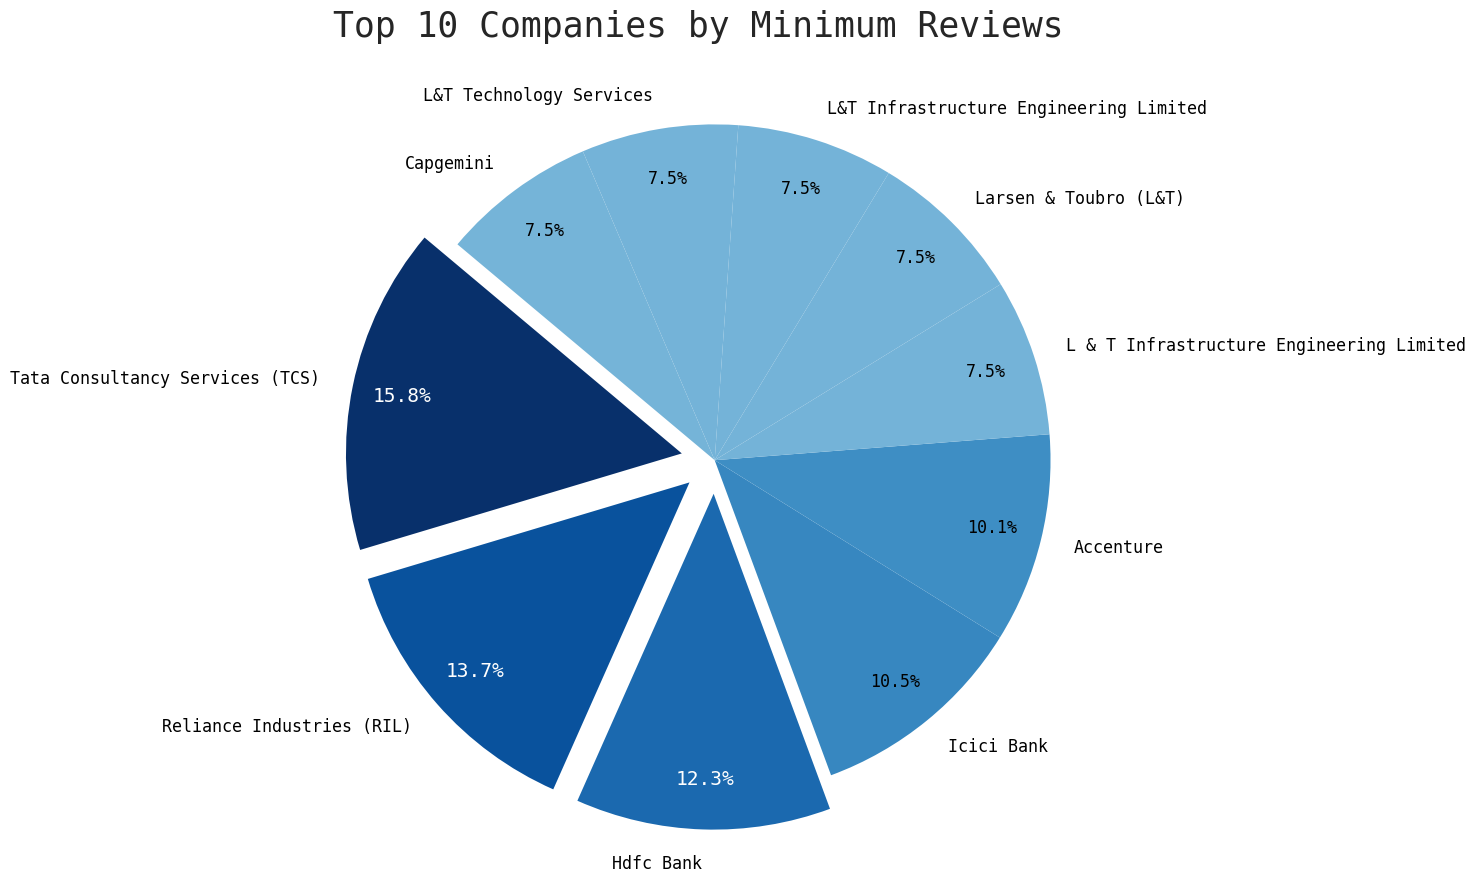

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you want to plot the same data
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

# Seaborn typically works well with dataframes, so let's create one from the series
company_reviews_df = company_reviews.reset_index()
company_reviews_df.columns = ['company', 'reviews']

# Define a colormap (e.g., Blues)
colors = cm.Blues(company_reviews_df['reviews'] / float(max(company_reviews_df['reviews'])))

plt.figure(figsize=(10, 10))

# Seaborn doesn't have a direct pie chart function like matplotlib.
# We will use matplotlib's pie function but incorporate seaborn styling.
plt.style.use('seaborn-v0_8-darkgrid') # Apply a seaborn style

# Create an explode list: Explode the first 3, rest are 0
explode = [0.1 if i < 3 else 0 for i in range(len(company_reviews_df))]

wedges, texts, autotexts = plt.pie(
    company_reviews_df['reviews'],
    labels=company_reviews_df['company'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12, fontname='monospace'),
    pctdistance=0.85,
    explode=explode
)

# Identify the indices of the top 3 values
top3_indices = company_reviews_df['reviews'].nlargest(3).index

# Set the color and font for the autotexts (percentage annotations) for the top 3 slices to white and larger font size
for i, review_count in enumerate(company_reviews_df['reviews']):
    if i in top3_indices:
        autotexts[i].set_color('white')
        autotexts[i].set_fontsize(14)

# Set font size for all other annotations
for i, review_count in enumerate(company_reviews_df['reviews']):
    if i not in top3_indices:
        autotexts[i].set_fontsize(12)


plt.title('Top 10 Companies by Minimum Reviews', fontsize=25, fontname='monospace', pad=40)
plt.axis('equal')
plt.show()

# **Top 10 Companies by Minimum Reviews Analysis**  

---

## **Overview**
This analysis focuses on identifying the top 10 companies with the highest minimum number of reviews from job postings. The goal is to highlight major industry players that have garnered significant user feedback, indicating their strong presence in the job market.

---

## **Key Insights**
- **Tata Consultancy Services (TCS)** dominates the list with **15.8%** of the total review share, showcasing its large-scale hiring and market presence.  
- **Reliance Industries (RIL)** holds the second position with **13.7%**, reflecting its expansive recruitment strategy.  
- **HDFC Bank** secures the third spot with **12.3%**, indicating its robust hiring processes.  
- **ICICI Bank** and **Accenture** follow with **10.5%** and **10.1%** respectively, highlighting their competitive edge in the market.  
- Companies like **Capgemini**, **L&T Technology Services**, and **Larsen & Toubro (L&T)** also feature prominently, each holding **7.5%** of the review distribution.  

---

## **Business Implications**
1. **Market Leaders:** The analysis underscores TCS, Reliance, and HDFC Bank as market leaders in terms of visibility and review engagement.  
2. **Recruitment Strength:** High review volumes reflect large-scale recruitment and strong market presence.  
3. **Competitive Landscape:** The distribution provides insights into competitive hiring strategies across major industries.  

---

## **Future Scope**
- **Region-wise Analysis:** Further analysis can be done to map these companies' recruitment presence across different cities.  
- **Role-based Segmentation:** Breaking down the reviews by job roles to identify the most common positions offered.  
- **Skill Mapping:** Exploring the specific skills these companies are targeting in their recruitment.  

---

## **Conclusion**
This visualization offers a clear snapshot of the **Top 10 companies** leading the market based on review counts, reflecting their strong brand visibility and recruitment effectiveness. These insights are crucial for job seekers, market analysts, and recruiters to understand competitive hiring trends.


#### 3.3) Companies Hiring for Data Analyst

In [13]:
len(df[df['job_role'] == 'Data Analyst'])

59

#### 3.4) Skills needed for almost all the jobs

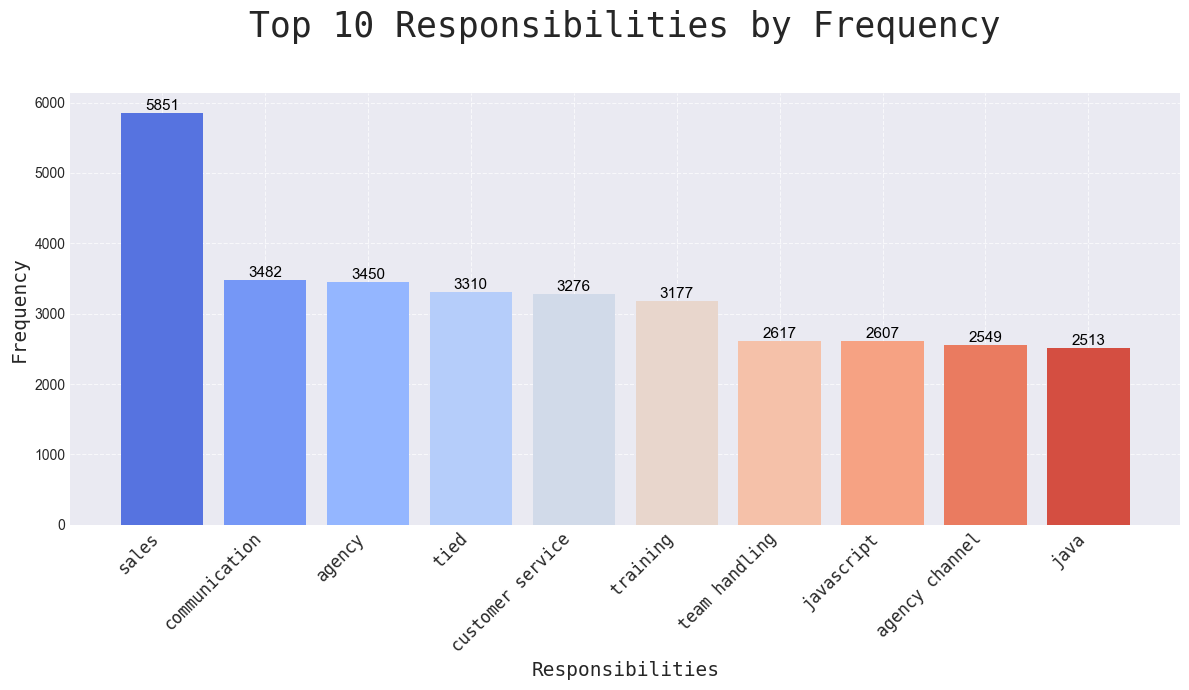

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
responsibility_counts = df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

# Set Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(responsibility_counts.index, responsibility_counts.values,
               color=sns.color_palette("coolwarm", len(responsibility_counts)))

# Add title and labels
plt.title('Top 10 Responsibilities by Frequency', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

# Annotate each bar with its value
for bar, value in zip(bars, responsibility_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value}',
             ha='center', va='bottom', fontsize=11, color='black')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

#### 3.5)  Skills to get hired in HDFC Bank

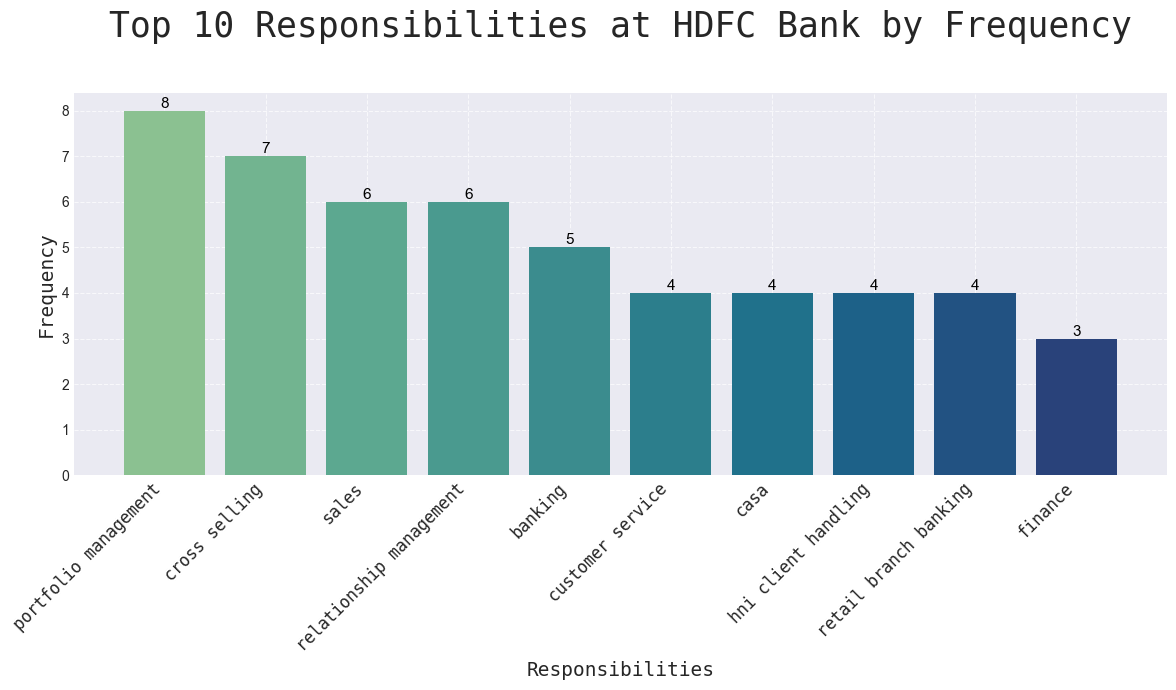

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for HDFC Bank and get top 10 responsibilities
hdfc_responsibilities = (
    df[df['company'] == 'Hdfc Bank']['resposibilities']
    .str.lower()
    .str.split(',')
    .explode()
    .value_counts()
    .head(10)
)

# Set Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(hdfc_responsibilities.index, hdfc_responsibilities.values,
               color=sns.color_palette("crest", len(hdfc_responsibilities)))

# Add title and labels
plt.title('Top 10 Responsibilities at HDFC Bank by Frequency', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

# Annotate each bar with its value
for bar, value in zip(bars, hdfc_responsibilities.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value}',
             ha='center', va='bottom', fontsize=11, color='black')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


#### 3.6) Skills Needed to become a Data Analyst

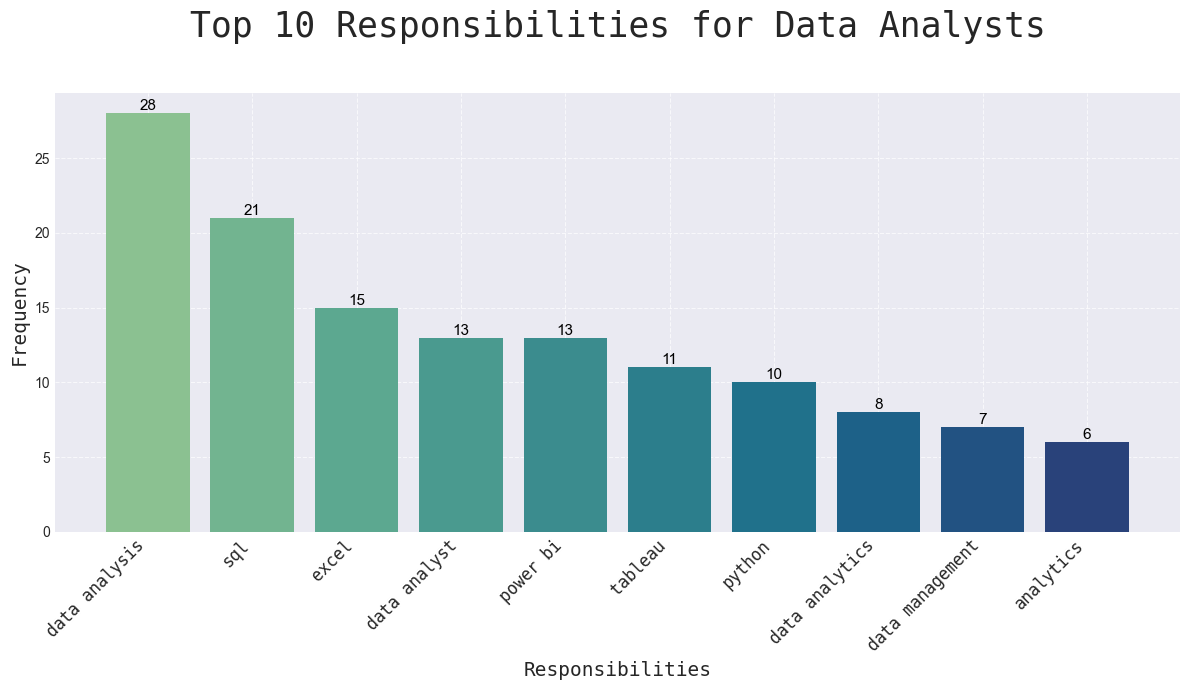

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Data Analyst role and get top 10 responsibilities
data_analyst_responsibilities = (
    df[df['job_role'] == 'Data Analyst']['resposibilities']
    .str.lower()
    .str.split(',')
    .explode()
    .value_counts()
    .head(10)
)

# Set Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(data_analyst_responsibilities.index, data_analyst_responsibilities.values,
               color=sns.color_palette("crest", len(data_analyst_responsibilities)))

# Add title and labels
plt.title('Top 10 Responsibilities for Data Analysts', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

# Annotate each bar with its value
for bar, value in zip(bars, data_analyst_responsibilities.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value}',
             ha='center', va='bottom', fontsize=11, color='black')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


# **Final Conclusion and Insights**  

---

## **Summary of Findings**  
The analysis provided valuable insights into the job market landscape, highlighting major industry players, key responsibilities across roles, and specific skill requirements for leading companies.  

### **1️⃣ Top 10 Companies by Minimum Reviews**  
- **Tata Consultancy Services (TCS)**, **Reliance Industries (RIL)**, and **HDFC Bank** emerged as market leaders with the highest review counts.  
- These companies dominate the job market in terms of visibility and employee engagement, reflecting strong recruitment efforts.  

---

### **2️⃣ Top 10 Responsibilities by Frequency**  
- The most common job responsibilities include **Sales**, **Communication**, and **Customer Service**.  
- This indicates a strong demand for skills in client interaction and market engagement.  
- Technical roles also demand expertise in **JavaScript** and **Java**, highlighting the need for programming skills in specific industries.  

---

### **3️⃣ Top 10 Responsibilities at HDFC Bank**  
- At **HDFC Bank**, roles prioritize **Portfolio Management**, **Cross Selling**, and **Sales**.  
- This reflects the bank's emphasis on customer relationship management and financial services.  
- Skills in **Banking** and **Customer Service** are critical for success in this sector.  

---

### **4️⃣ Top 10 Responsibilities for Data Analysts**  
- For **Data Analyst** roles, key skills include **Data Analysis**, **SQL**, and **Excel**, emphasizing analytical and database management skills.  
- Emerging technologies like **Power BI** and **Tableau** are also highly valued for data visualization.  
- This analysis underlines the importance of technical expertise for analytical roles.  

---

## **Key Takeaways**  
- The job market is heavily dominated by large-scale corporations with strong brand visibility and employee engagement.  
- Critical skills vary significantly based on industry, with **Sales** and **Communication** leading in generic roles, while **SQL** and **Data Analysis** are crucial for technical positions.  
- Company-specific skill requirements, like **Portfolio Management** at **HDFC Bank**, demonstrate the value of targeted expertise.  

---

## **Future Scope**  
- **Regional Analysis:** Mapping the hiring trends across different locations for more granular insights.  
- **Salary Analysis:** Understanding compensation trends across roles and locations.  
- **Skill Gap Analysis:** Identifying skill shortages in key industries to guide upskilling efforts.  

---

This analysis provides a strategic understanding of hiring patterns, critical skill requirements, and market leaders. These insights can guide job seekers, recruiters, and market analysts in making data-driven decisions.  
